CREATED BY:

Lucas Mertens - 
lucas.mertens@fu-berlin.de

CREATED ON:
22.11.2023

All Rights Reserved

###############################

Import the sql-lite library to connect with a DB and work with it:

In [1]:
import sqlite3

Let's create a simple new database with two relations:

In [6]:
# Connect to a database (or create it if it doesn't exist)
# The with statement makes it a little easier, everything indented now is connected to the example.db
with sqlite3.connect('example.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Execute a SQL command to create a table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS employees (
        id INTEGER PRIMARY KEY,
        name TEXT NOT NULL,
        position TEXT,
        salary REAL
    )
    ''')
    # For now, the changes are only stored in cach, so they have to be committed 
    conn.commit()
    
    # Insert some sample data
    cursor.execute("INSERT INTO employees (name, position, salary) VALUES ('Fred Mueller', 'Manager', 50000.00)")
    cursor.execute("INSERT INTO employees (name, position, salary) VALUES ('Jane Smith', 'Developer', 60000.00)")

    # Commit the changes
    conn.commit()

    # Execute a SELECT statement
    cursor.execute("SELECT * FROM employees")

    # Fetch all the rows
    rows = cursor.fetchall()
    
    # Print the results
    for row in rows:
        print(row)

(1, 'Fred Mueller', 'Manager', 50000.0)
(2, 'Jane Smith', 'Developer', 60000.0)
(3, 'Fred Mueller', 'Manager', 50000.0)
(4, 'Jane Smith', 'Developer', 60000.0)
(5, 'Fred Mueller', 'Manager', 50000.0)
(6, 'Jane Smith', 'Developer', 60000.0)
(7, 'Fred Mueller', 'Manager', 50000.0)
(8, 'Jane Smith', 'Developer', 60000.0)
(9, 'Fred Mueller', 'Manager', 50000.0)
(10, 'Jane Smith', 'Developer', 60000.0)


**Connection:**

 When you connect to a database using sqlite3.connect(), you get a connection object (conn). This connection represents a session with the database.

**Cursor:**

 After obtaining a connection, you create a cursor object (cursor) using conn.cursor(). The cursor is used to execute SQL commands and navigate the result set

**Database Operations:**

 You perform various database operations using the cursor, such as creating tables, inserting data, updating records, or querying data.

**Commit:**

 Once you've made changes to the database (inserted, updated, or deleted records), you need to commit those changes to the database file. This is done by calling conn.commit(). Until you commit, the changes are only in memory, and the database file on disk remains unchanged.

**Close Connection:**

 After committing, it's a good practice to close the connection using conn.close(). This ensures that the resources associated with the connection are released. This is NOT required if a with statement is used!

Numeric Data Types:

    INT or INTEGER:
        Represents integer values (e.g., 1, 100, -45).

    FLOAT or REAL:
        Represents floating-point numbers (e.g., 3.14, -0.01).

    DOUBLE:
        Represents double-precision floating-point numbers.

    DECIMAL or NUMERIC:
        Represents fixed-point numbers with a specified precision and scale.

Character String Data Types:

    CHAR(n):
        Fixed-length character string. It always reserves the same amount of storage, padding with spaces if necessary.

    VARCHAR(n) or CHARACTER VARYING(n):
        Variable-length character string. It only stores as much data as needed.

    TEXT:
        Variable-length character string with no specified maximum length.

Date and Time Data Types:

    DATE:
        Represents a date (e.g., '2023-01-01').

    TIME:
        Represents a time of day (e.g., '12:30:00').

    DATETIME or TIMESTAMP:
        Represents a combination of date and time.

Boolean Data Type:

    BOOLEAN:
        Represents true or false values.

Let's work with a new database "product_database.db". Since we are new to the project, we want to figure out what the db is about and what data we can fetch. To see all the tables in a DB we can use this command:

    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [7]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Query the sqlite_master table to get the names of all tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    # Fetch all the table names
    tables = cursor.fetchall()

    # Print the table names
    for table in tables:
        print(table[0])


categories
suppliers
products


Now we know all the tables that exists! But we dont know the attributes and values yet...

In [8]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    cursor.execute(f"PRAGMA table_info(categories);")

    # Fetch all the schema information
    columns = cursor.fetchall()

    # Print the column names
    for column in columns:
        print(column[1])  # Index 1 contains the column name

    # Query the sqlite_master table to get the names of all tables
    cursor.execute("SELECT * FROM categories;")

    # Fetch all the rows
    rows = cursor.fetchall()

    # Print the results
    for row in rows:
        print(row)

category_id
category_name
description
(1, 'Electronics', 'Electronic devices and gadgets')
(2, 'Clothing', 'Various types of clothing items')
(3, 'Appliances', 'Home appliances for daily use')
(4, 'Books', 'Books of different genres')


In [9]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    cursor.execute(f"PRAGMA table_info(suppliers);")

    # Fetch all the schema information
    columns = cursor.fetchall()

    # Print the column names
    for column in columns:
        print(column[1])  # Index 1 contains the column name

    # Query the sqlite_master table to get the names of all tables
    cursor.execute("SELECT * FROM suppliers;")

    # Fetch all the rows
    rows = cursor.fetchall()

    # Print the results
    for row in rows:
        print(row)

supplier_id
supplier_name
contact_person
phone_number
(1, 'TechGadgets Inc.', 'John Tech', '123-456-7890')
(2, 'FashionHub Ltd.', 'Jane Fashion', '987-654-3210')
(3, 'HomeAppliance Co.', 'Bob Appliances', '555-123-4567')


In [21]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    cursor.execute(f"PRAGMA table_info(products);")

    # Fetch all the schema information
    columns = cursor.fetchall()

    # Print the column names
    for column in columns:
        print(column[1])  # Index 1 contains the column name

    # Query the sqlite_master table to get the names of all tables
    cursor.execute("SELECT * FROM products;")

    # Fetch all the rows
    rows = cursor.fetchall()

    # Print the results
    for row in rows:
        print(row)

product_id
product_name
quantity
price
category_id
supplier_id
(1, 'Laptop', 20, 999.99, 1, 1)
(2, 'Smartphone', 30, 599.99, 1, 1)
(3, 'T-shirt', 50, 19.99, 2, 2)
(4, 'Jeans', 40, 39.99, 2, 2)
(5, 'Refrigerator', 10, 899.99, 3, 3)
(6, 'Washing Machine', 15, 499.99, 3, 3)
(7, 'Headphones', 25, 79.99, 1, 1)
(8, 'Dress Shirt', 35, 29.99, 2, 2)
(9, 'Microwave', 12, 129.99, 3, 3)
(10, 'Blender', 18, 49.99, 3, 3)
(11, 'Tablet', 15, 299.99, 1, 1)


Okay nice! Now we can get an idea how the db is structured!

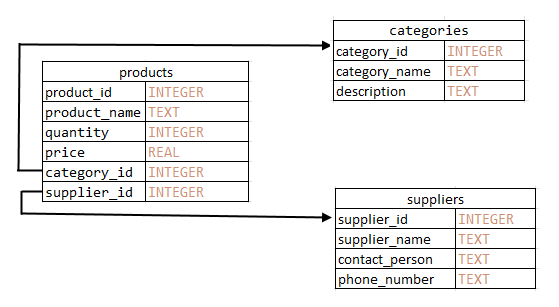

Let's fetch some data! We want to know the category of Laptops and also the supplier. So we need information of all three relations (=tables)!

Let's start to see all the products with the name "Laptop"! We can specify conditions with the WHERE statement. Just specify WHERE after the FROM and give conditions for attributes (=columns) from the relation (=table).

In [12]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()


    # Query to retrieve the category for the specified product
    cursor.execute('''
        SELECT *
        FROM products
        WHERE products.product_name = 'Laptop';
    ''')

    # Fetch all the rows
    rows = cursor.fetchall()

    # Print the results
    for row in rows:
        print(row)


(1, 'Laptop', 20, 999.99, 1, 1)


Let's get the category of a product! We now need to JOIN tables. For joining tables, it is essential to understand the structure of the DB. Basic rule: ONLY JOIN ON KEYS!

Syntax: 

SELECT *

FROM TABLE1

JOIN TABLE2 ON TABLE1.FOREIGN_KEY = TABLE2.PRIMARY_KEY

In [18]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Query to retrieve the category for the specified product
    cursor.execute('''
        SELECT products.product_name, categories.category_name
        FROM products
        JOIN categories ON products.category_id = categories.category_id
        WHERE products.product_name = 'Laptop';
    ''')

    # Fetch all the rows
    rows = cursor.fetchall()

    # Print the results
    for row in rows:
        print(row)


('Laptop', 'Electronics')


Nice! Now let's get the supplier!

In [17]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Query to retrieve the supplier for the specified product
    cursor.execute('''
        SELECT *
        FROM products
        JOIN suppliers ON products.supplier_id = suppliers.supplier_id
        WHERE products.product_name = 'Laptop';
    ''')

    # Fetch all the rows
    rows = cursor.fetchall()

    # Print the results
    for row in rows:
        print(row)

(1, 'Laptop', 20, 999.99, 1, 1, 1, 'TechGadgets Inc.', 'John Tech', '123-456-7890')


Perfect! If we want it all together, we can join muliple tables in the same command:

In [19]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Query to retrieve the supplier for the specified product
    cursor.execute('''
        SELECT *
        FROM products
        JOIN categories ON products.category_id = categories.category_id
        JOIN suppliers ON products.supplier_id = suppliers.supplier_id
        WHERE products.product_name = 'Laptop';
    ''')

    # Fetch all the rows
    rows = cursor.fetchall()

    # Print the results
    for row in rows:
        print(row)

(1, 'Laptop', 20, 999.99, 1, 1, 1, 'Electronics', 'Electronic devices and gadgets', 1, 'TechGadgets Inc.', 'John Tech', '123-456-7890')


Lastly, let's add a new product!

In [20]:
# Connect to the SQLite database
with sqlite3.connect('product_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Insert the new product into the Products table
    cursor.execute('''
        INSERT INTO products (product_name, quantity, price, category_id, supplier_id)
        VALUES ('Tablet', 15,  299.99, 1, 1);
    ''')

    # Commit the changes
    conn.commit()

    print("New product added successfully.")

New product added successfully.


Now it is your time to shine! There is a new database: university_database.db
Try to figure out what the database is about and write down a relational model! Execute useful statements that contain the following commands:

SELECT

WHERE

JOIN

Can you tell me what courses student Mike is enrolled to and what professors will be teaching him?

Add a new student to the database end enroll him to at least one class.

In [ ]:
# Connect to the SQLite database
with sqlite3.connect('practice_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Create the Orders table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS orders (
            order_id INTEGER PRIMARY KEY,
            customer_id INTEGER,
            product_name TEXT,
            order_amount REAL
        )
    ''')

    # Insert data into the Orders table
    cursor.executemany("INSERT INTO orders (customer_id, product_name, order_amount) VALUES (?, ?, ?)", [
        (1, 'Laptop', 1200.00),
        (2, 'Smartphone', 599.99),
        (1, 'Tablet', 349.99),
        (3, 'Headphones', 99.99),
        (2, 'Smartwatch', 199.99),
        (3, 'Speaker', 79.99),
        (1, 'Monitor', 299.99),
        (2, 'Laptop', 1500.00),
        (3, 'Tablet', 449.99),
        (1, 'Keyboard', 49.99),
    ])

    # Commit the changes
    conn.commit()

In [ ]:
# Connect to the SQLite database
with sqlite3.connect('practice_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    # Query to calculate the average order amount for each customer
    cursor.execute('''
        SELECT customer_id, AVG(order_amount) AS average_order_amount
        FROM orders
        GROUP BY customer_id;
    ''')

    # Fetch the result
    results = cursor.fetchall()

    # Print the result
    print("Average order amount for each customer:")
    for result in results:
        customer_id, average_order_amount = result
        print(f"Customer ID: {customer_id}, Average Order Amount: ${average_order_amount:.2f}")

In [ ]:
# Connect to the SQLite database
with sqlite3.connect('practice_database.db') as conn:
    # Create a cursor object to execute SQL commands
    # Query to find out how many orders each customer has placed
    cursor.execute('''
        SELECT customer_id, COUNT(order_id) AS total_orders
        FROM orders
        GROUP BY customer_id;
    ''')

    # Fetch the result
    results = cursor.fetchall()

    # Print the result
    print("\nTotal number of orders placed by each customer:")
    for result in results:
        customer_id, total_orders = result
        print(f"Customer ID: {customer_id}, Total Orders: {total_orders}")

Now let's practice! First we create a new practice DB:

In [25]:
with sqlite3.connect('practice_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Create the Employees table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS employees (
            employee_id INTEGER PRIMARY KEY,
            department_id INTEGER,
            salary REAL
        )
    ''')

    # Insert data into the Employees table
    cursor.executemany("INSERT INTO employees (department_id, salary) VALUES (?, ?)", [
        (1, 50000.00),
        (2, 60000.00),
        (1, 55000.00),
        (3, 70000.00),
        (2, 62000.00),
        (1, 58000.00),
        (3, 72000.00),
        (2, 63000.00),
        (3, 75000.00),
        (1, 59000.00),
    ])

    # Commit the changes
    conn.commit()

Query1: Calculate the average salary for each department

Query2: Find out how many employees are in each department

#######################################################################

ONLY if you are interested, the command to create our product_database:

In [1]:
import sqlite3

# Connect to a database file (or create it if it doesn't exist)
conn = sqlite3.connect('product_database.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Create the Categories table with a new attribute 'description'
cursor.execute('''
    CREATE TABLE IF NOT EXISTS categories (
        category_id INTEGER PRIMARY KEY,
        category_name TEXT NOT NULL,
        description TEXT
    )
''')

# Create the Suppliers table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS suppliers (
        supplier_id INTEGER PRIMARY KEY,
        supplier_name TEXT NOT NULL,
        contact_person TEXT,
        phone_number TEXT
    )
''')

# Create the Products table with foreign keys to Categories and Suppliers
cursor.execute('''
    CREATE TABLE IF NOT EXISTS products (
        product_id INTEGER PRIMARY KEY,
        product_name TEXT NOT NULL,
        quantity INTEGER,
        price REAL,
        category_id INTEGER,
        supplier_id INTEGER,
        FOREIGN KEY (category_id) REFERENCES categories(category_id),
        FOREIGN KEY (supplier_id) REFERENCES suppliers(supplier_id)
    )
''')

# Insert data into the Categories table with descriptions
cursor.executemany("INSERT INTO categories (category_name, description) VALUES (?, ?)",
                   [('Electronics', 'Electronic devices and gadgets'),
                    ('Clothing', 'Various types of clothing items'),
                    ('Appliances', 'Home appliances for daily use'),
                    ('Books', 'Books of different genres')])

# Insert data into the Suppliers table
cursor.executemany("INSERT INTO suppliers (supplier_name, contact_person, phone_number) VALUES (?, ?, ?)",
                   [('TechGadgets Inc.', 'John Tech', '123-456-7890'),
                    ('FashionHub Ltd.', 'Jane Fashion', '987-654-3210'),
                    ('HomeAppliance Co.', 'Bob Appliances', '555-123-4567')])

# Insert data into the Products table
cursor.executemany("INSERT INTO products (product_name, quantity, price, category_id, supplier_id) VALUES (?, ?, ?, ?, ?)",
                   [('Laptop', 20, 999.99, 1, 1),
                    ('Smartphone', 30, 599.99, 1, 1),
                    ('T-shirt', 50, 19.99, 2, 2),
                    ('Jeans', 40, 39.99, 2, 2),
                    ('Refrigerator', 10, 899.99, 3, 3),
                    ('Washing Machine', 15, 499.99, 3, 3),
                    ('Headphones', 25, 79.99, 1, 1),
                    ('Dress Shirt', 35, 29.99, 2, 2),
                    ('Microwave', 12, 129.99, 3, 3),
                    ('Blender', 18, 49.99, 3, 3)])

# Commit the changes
conn.commit()

# Close the connection
conn.close()

And the command to create our students DB

In [32]:
import sqlite3

# Connect to the SQLite database
with sqlite3.connect('university_database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Create the Students table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS students (
            student_id INTEGER PRIMARY KEY,
            first_name TEXT NOT NULL,
            last_name TEXT NOT NULL,
            birthdate DATE,
            email TEXT
        )
    ''')

    # Create the Courses table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS courses (
            course_id INTEGER PRIMARY KEY,
            course_name TEXT NOT NULL,
            department TEXT
        )
    ''')

    # Create the Instructors table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS instructors (
            instructor_id INTEGER PRIMARY KEY,
            first_name TEXT NOT NULL,
            last_name TEXT NOT NULL,
            email TEXT
        )
    ''')

    # Create the Enrollments table (junction table)
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS enrollments (
            enrollment_id INTEGER PRIMARY KEY,
            student_id INTEGER,
            course_id INTEGER,
            FOREIGN KEY (student_id) REFERENCES students(student_id),
            FOREIGN KEY (course_id) REFERENCES courses(course_id)
        )
    ''')

    # Insert data into the Students table
    cursor.executemany("INSERT INTO students (first_name, last_name, birthdate, email) VALUES (?, ?, ?, ?)", [
        ('John', 'Doe', '1990-05-15', 'john.doe@example.com'),
        ('Jane', 'Smith', '1992-08-22', 'jane.smith@example.com'),
        ('Mike', 'Johnson', '1991-03-10', 'mike.johnson@example.com'),
        ('Emily', 'Williams', '1993-11-05', 'emily.williams@example.com')
    ])

    # Insert data into the Courses table
    cursor.executemany("INSERT INTO courses (course_name, department) VALUES (?, ?)", [
        ('Introduction to Programming', 'Computer Science'),
        ('Mathematics I', 'Mathematics'),
        ('History of Art', 'Art'),
        ('Chemistry Basics', 'Chemistry')
    ])

    # Insert data into the Instructors table
    cursor.executemany("INSERT INTO instructors (first_name, last_name, email) VALUES (?, ?, ?)", [
        ('Professor', 'Johnson', 'prof.johnson@example.com'),
        ('Professor', 'Smith', 'prof.smith@example.com'),
        ('Professor', 'Williams', 'prof.williams@example.com'),
        ('Professor', 'Doe', 'prof.doe@example.com')
    ])

    # Insert data into the Enrollments table
    cursor.executemany("INSERT INTO enrollments (student_id, course_id) VALUES (?, ?)", [
        (1, 1), (1, 2), (2, 2), (3, 3),
        (3, 1), (4, 4), (4, 3), (2, 4)
    ])

    # Commit the changes
    conn.commit()

    print("Database created and populated successfully.")


Database created and populated successfully.
